# Project: Customer Personality Analysis

By: odubajo abdul qoyyum


This notebook covers:
- Loading the data
- Data  assessing
- Feature Engineering and Data cleaning
- Simple EDA
- Feature scaling and dimensionality reduction
- Creating a simple model

### Importing libraries

In [1]:
  # dataframe and plotting
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

###  Load the dataset

In [2]:
# Load files into a pandas dataframe
df = pd.read_csv('marketing_campaign.csv',sep='\t')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


###  Data Assessing 

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# checking for duplicate rows

df.duplicated().sum()

0

In [6]:
# checking missing data

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# looking at the rows with missing data

df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [8]:
df.dropna(inplace=True)

In [9]:
#converting the date column to datetime datatype

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

##  Feature Engineering and Data cleaning

#### Feature Engineering on marital status

In [10]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
# creating a function for converting the marital status

def convert_marital(x):
    
        """
    Simplifying  marital status to 1 if he/she was married or together
    else 0
    """
        
        if x == "Married" or  x=="Together" :
            return '1'
        else : 
            return '0'

In [12]:
# applying the function

df["Marital_Status"] = df["Marital_Status"].apply(lambda x : convert_marital(x))

####  Feature Engineering on Education

In [13]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [14]:
def convert_education(x):
    """
    converting customer Education to 0 if 2n Cycle or Basic
    else convert to 1
    """
    if x =='2n Cycle'  or  x =='Basic' :
        return '0'
    else : 
        return '1'

In [15]:
# applying the function

df["Education"] = df["Education"].apply(lambda x : convert_education(x))

In [16]:
#creating a column for customer age

df['Age'] =(datetime.now().year) - df['Year_Birth'] 

In [17]:
#creating a column for total years of being a customer

df['total_years'] = datetime.now().year - df['Dt_Customer'].dt.year 

In [18]:
#creating a column for total children

df["Children"] = df["Kidhome"] + df["Teenhome"]

In [19]:
# Total amount spent on products

columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['total_product_spent'] = df[columns].sum(axis=1) 

In [20]:
#creating a column for total purchases without discount

df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [21]:
#creating a column for total promotions accepted by customers

df['TotalPromotions'] = df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['AcceptedCmp1']+df['AcceptedCmp2']  

In [22]:
#dropping some irrelevant columns

df = df.drop(['ID','Dt_Customer','Year_Birth','Z_CostContact', 'Z_Revenue', 'Response',"Kidhome","Teenhome",
              'AcceptedCmp1' , 'AcceptedCmp2', 'AcceptedCmp3' , 'AcceptedCmp4','AcceptedCmp5'],axis=1)

## Exploratory Data Analysis

In [23]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'total_years', 'Children', 'total_product_spent',
       'TotalPurchases', 'TotalPromotions'],
      dtype='object')

In [24]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,total_years,Children,total_product_spent,TotalPurchases,TotalPromotions
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.009477,53.179603,8.971570,0.947202,607.075361,12.557310,0.298285
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.096907,11.985554,0.685618,0.749062,602.900476,7.204611,0.679209
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.000000,0.000000,5.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,45.000000,9.000000,0.000000,69.000000,6.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,52.000000,9.000000,1.000000,396.500000,12.000000,0.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,63.000000,9.000000,1.000000,1048.000000,18.000000,0.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,129.000000,10.000000,3.000000,2525.000000,32.000000,4.000000


- the data contains a lot of outliers

In [25]:
# creating a function to remove outliers

def remove_outliers(data, column):
    mean=data[column].std()
    std=data[column].mean()

    #generating the treshold
    treshold=mean+std*3

    #getting the data below the treshold

    data=data[data[column] <=treshold]

    return data


In [26]:
#removing the outiers

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Income')
df = remove_outliers(df, 'MntMeatProducts')
df = remove_outliers(df, 'MntFishProducts')
df = remove_outliers(df, 'MntSweetProducts')
df = remove_outliers(df, 'MntGoldProds')
df = remove_outliers(df, 'NumCatalogPurchases')
df = remove_outliers(df, 'NumDealsPurchases')
df = remove_outliers(df, 'NumWebVisitsMonth')


In [27]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,total_years,Children,total_product_spent,TotalPurchases,TotalPromotions
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,46575.538593,48.739501,237.385358,16.396141,98.885925,21.262202,14.228717,29.940409,2.356981,3.690125,1.772985,5.245743,5.740068,0.010783,52.973326,8.944949,1.081158,418.098751,10.708854,0.212826
std,19060.030820,28.846511,305.911298,27.982934,138.586869,31.874674,21.052580,33.279372,1.627151,2.569733,1.977039,3.051572,2.103639,0.103310,11.732049,0.678902,0.720982,472.284820,6.537866,0.551283
min,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.000000,0.000000,5.000000,0.000000,0.000000
25%,32338.250000,24.000000,16.000000,1.000000,12.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,45.000000,8.000000,1.000000,55.000000,5.000000,0.000000
50%,45031.500000,49.000000,87.500000,5.000000,37.000000,7.000000,5.000000,17.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,52.000000,9.000000,1.000000,196.500000,9.000000,0.000000
75%,60381.500000,74.000000,375.000000,17.000000,125.000000,24.000000,17.000000,40.000000,3.000000,5.000000,3.000000,7.000000,7.000000,0.000000,62.000000,9.000000,1.000000,679.750000,16.000000,0.000000
max,162397.000000,99.000000,1493.000000,194.000000,724.000000,158.000000,100.000000,157.000000,9.000000,11.000000,8.000000,13.000000,14.000000,1.000000,129.000000,10.000000,3.000000,2231.000000,29.000000,4.000000


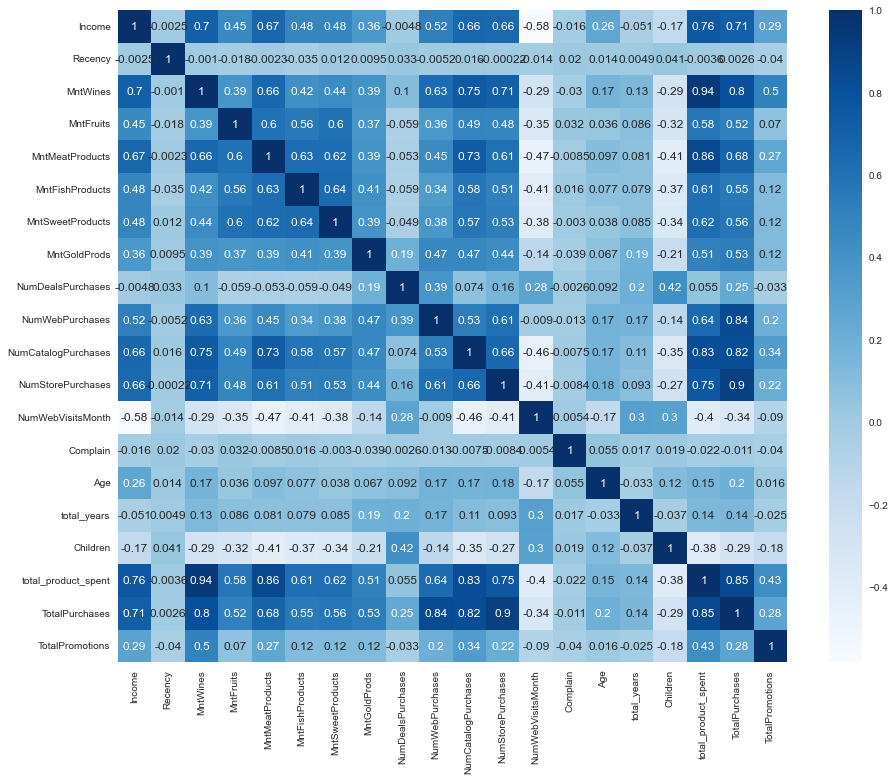

In [28]:
#checking for correlation

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cbar=True, cmap='Blues')
plt.show()

### Feature Scaling and standardization

In [29]:
# scaling using standard scaler

scaler = StandardScaler()
scaler.fit(df)


StandardScaler()

In [30]:
df_standardized = pd.DataFrame(scaler.transform(df), columns=df.columns)

df_standardized.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,total_years,Children,total_product_spent,TotalPurchases,TotalPromotions
0,0.356818,-1.360563,-0.012151,-0.372404,-0.740246,-0.550354,-0.670426,-0.604482,-0.628544,-0.719581,...,-0.391092,-1.063932,-0.351904,-0.104407,1.281186,-1.392272,1.274793,-0.828334,-1.026445,-0.386166
1,0.356818,0.734990,1.313984,-0.788517,0.616741,1.165464,0.202920,2.816132,0.321728,0.362477,...,0.114858,1.558412,-0.827405,-0.104407,0.343317,0.081111,-1.499988,0.758023,1.421532,-0.386166
2,0.356818,0.734990,-1.045916,-0.788517,-0.740246,-0.443115,-0.569378,-0.353428,-0.533517,-0.749638,...,-0.897043,-0.408346,0.123598,-0.104407,-1.276638,-1.392272,-0.112598,-0.773267,-0.720448,-0.386166
3,0.356818,0.734990,0.614941,1.569457,-0.210530,0.950987,0.137960,0.776316,0.606810,-0.449066,...,0.620809,0.247240,-0.351904,-0.104407,-1.020855,-1.392272,-0.112598,0.008263,0.503541,-0.386166
4,0.356818,0.734990,0.836409,-1.135278,0.924107,0.915241,-0.006394,-0.667246,1.319514,-0.479124,...,1.126759,1.558412,0.123598,-0.104407,0.172796,0.081111,-0.112598,0.630945,1.421532,-0.386166


### Dimensionality Reduction

In [31]:
pca = PCA(n_components=3)
pca.fit_transform(df_standardized)

pca.explained_variance_ratio_

array([0.37061646, 0.09401428, 0.06840656])

In [32]:
#pd.DataFrame(pca.components_.T,index=df_standardized.columns)

## model building

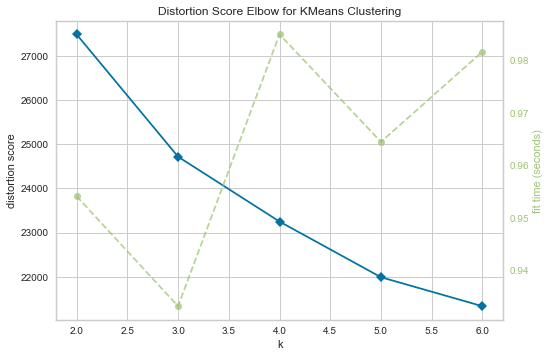

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
Elbow = KElbowVisualizer(KMeans(), k=6)
Elbow.fit(df_standardized)
Elbow.show()

In [34]:
model = KMeans(n_clusters=4)
model_pred = model.fit_predict(df_standardized)

In [35]:
# add predicted clusters for each data point into dataframe 
df["Clusters"]= model_pred

# add predicted clusters for each data point into reduced dimension data   
df_standardized["Clusters"] = model_pred

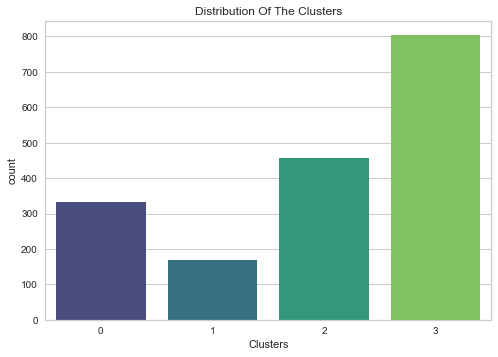

In [36]:
fig = sns.countplot(x=df_standardized["Clusters"], palette= "viridis")
fig.set_title("Distribution Of The Clusters")
plt.show()

##### Income vs total Spent of each cluster

Text(0.5, 1.0, 'Income vs Spent of each cluster')

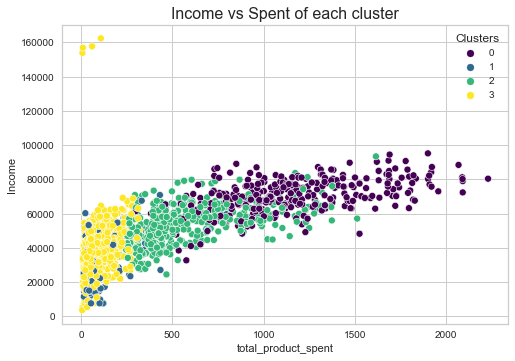

In [37]:
income_vs_totalspent = sns.scatterplot(data = df,x=df["total_product_spent"], y=df["Income"],hue=df["Clusters"], palette= 'viridis')
income_vs_totalspent.set_title('Income vs Spent of each cluster',fontsize=16)

#### children In Each Cluster

Text(0.5, 1.0, 'children In Each Cluster')

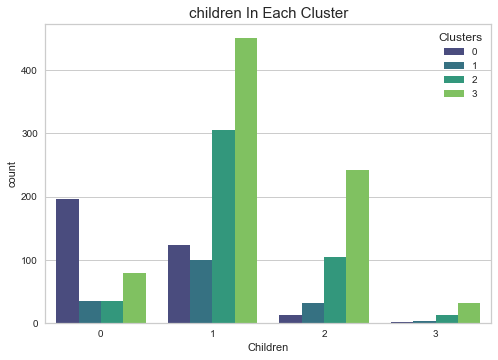

In [38]:
children_no = sns.countplot(x=df['Children'],hue=df['Clusters'], palette='viridis')
children_no.set_title("children In Each Cluster", size=15)